# Convolutional Neural Network

## Load data

In [1]:
import sys
sys.path.insert(1, '../00_Classes')
import numpy as np
import pandas as pd
from datetime import datetime
import jupyprint.jupyprint as jp
import matplotlib.pyplot as plt

import CNN_Class

CNN = CNN_Class.MyCNN()

In [2]:
import numpy as np
import gzip

def load_MNIST_images(filename):
	with gzip.open(filename, 'r') as f:
		# first 4 bytes is a magic number
		magic_number    = int.from_bytes(f.read(4), 'big')
		# second 4 bytes is the number of images
		image_count     = int.from_bytes(f.read(4), 'big')
		# third 4 bytes is the row count
		row_count       = int.from_bytes(f.read(4), 'big')
		# fourth 4 bytes is the column count
		column_count    = int.from_bytes(f.read(4), 'big')
		
		# rest is the image pixel data, each pixel is stored as an unsigned byte
		# pixel values are 0 to 255
		images = np.frombuffer(f.read(), dtype=np.uint8)\
			.reshape((image_count, row_count, column_count))
	# images.shape --> (10000, 28, 28)
	return images


def load_MNIST_labels(filename):
	with gzip.open(filename, 'r') as f:
		# first 4 bytes is a magic number
		magic_number    = int.from_bytes(f.read(4), 'big')
		# second 4 bytes is the number of labels
		label_count     = int.from_bytes(f.read(4), 'big')
		
		# rest is the label data, each label is stored as unsigned byte
		# label values are 0 to 9
		label_data      = f.read()
		labels = np.frombuffer(label_data, dtype=np.uint8)
	# labels.shape --> (10000,)
	return labels

# Load data
images = CNN.load_MNIST_images('MNIST_data/t10k-images-idx3-ubyte.gz')
labels = CNN.load_MNIST_labels('MNIST_data/t10k-labels-idx1-ubyte.gz')

In [3]:
print('images shape', images.shape)
print('labels shape', labels.shape)

images shape (10000, 28, 28)
labels shape (10000,)


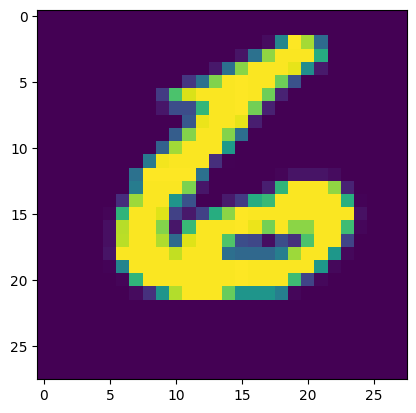

In [4]:
import matplotlib.pyplot as plt
# image = np.asarray(images[0]).squeeze()
plt.imshow(images[9999])
plt.show()

## Pool

provare filtro max

In [5]:
from scipy.signal import convolve2d

def Pool(x):
    xrow, xcol, numFilters = x.shape
    y = np.zeros((xrow // 2, xcol // 2, numFilters))  # Divisione intera per 2
    
    for k in range(numFilters):
        filter = np.ones((2, 2)) / (2 * 2)
        image = convolve2d(x[:, :, k], filter, mode='valid')
        y[:, :, k] = image[0::2, 0::2]  # prendo la media e la metto nel pixel che scelgo ogni 4
        
    return y

# Esempio di utilizzo:
x = np.zeros((6, 6, 3))

for i in range(6) :
    for j in range(6):
        if i < 3 & j < 3:
            x[i,j,:] = 1
        elif i >= 3 & j >= 3:
            x[i,j,:] = 2

y = Pool(x)
print(x)
print(y)


[[[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [2. 2. 2.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [2. 2. 2.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [2. 2. 2.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0.25 0.25 0.25]
  [0.5  0.5  0.5 ]
  [0.25 0.25 0.25]]

 [[0.   0.   0.  ]
  [0.5  0.5  0.5 ]
  [0.   0.   0.  ]]

 [[0.   0.   0.  ]
  [1.   1.   1.  ]
  [0.   0.   0.  ]]]


## conv

In [6]:
def Conv(x, W):
    wrow, wcol, numFilters = W.shape
    xrow, xcol = x.shape

    yrow = xrow - wrow + 1
    ycol = xcol - wcol + 1

    y = np.zeros((yrow, ycol, numFilters))

    for k in range(numFilters):
        filter = W[:, :, k]
        #filter = np.rot90(filter, 2)
        y[:, :, k] = convolve2d(x[:, :], filter, mode='valid')

    return y

# Esempio di utilizzo:
x = np.zeros((6, 6))

for i in range(6) :
    for j in range(6):
        if i < 3 and j < 3:
            x[i,j] = 1
        elif i >= 3 and j >= 3:
            x[i,j] = 2
        elif i < 3 and j >= 3:
            x[i,j] = 3


W = np.ones((2, 2, 3))

y = Conv(x, W)

print('W ', W)
print('x ', x[:,:])
print('y ', y[:,:,0])

W  [[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]
x  [[1. 1. 1. 3. 3. 3.]
 [1. 1. 1. 3. 3. 3.]
 [1. 1. 1. 3. 3. 3.]
 [0. 0. 0. 2. 2. 2.]
 [0. 0. 0. 2. 2. 2.]
 [0. 0. 0. 2. 2. 2.]]
y  [[ 4.  4.  8. 12. 12.]
 [ 4.  4.  8. 12. 12.]
 [ 2.  2.  6. 10. 10.]
 [ 0.  0.  4.  8.  8.]
 [ 0.  0.  4.  8.  8.]]


## Train and Test Mnist Conv

In [7]:
np.random.seed(1)

W1 = 1e-2 * np.random.randn(9, 9, 20)
W5 = (2 * np.random.rand(100, 2000) - 1) * np.sqrt(6) / np.sqrt(360 + 2000)
Wo = (2 * np.random.rand(10, 100) - 1) * np.sqrt(6) / np.sqrt(10 + 100)

X = images[:7000, :, :]
D = labels[:7000]

# Training
for epoch in range(10):
    print("Epoch:", epoch + 1)
    W1, W5, Wo = SGD_MnistConv(W1, W5, Wo, X, D)

# Save model weights
#with h5py.File('MnistConv.h5', 'w') as hf:
#    hf.create_dataset('W1', data=W1)
#    hf.create_dataset('W5', data=W5)
#    hf.create_dataset('Wo', data=Wo)

# Evaluation
X_test = images[7001:10000, :, :]
D_test = labels[7001:10000]
acc = 0
N = len(D_test)

for k in range(N):
    print("Sample:", k + 1)
    x = X_test[:, :, k]
    y1 = Conv(x, W1)
    y2 = CNN.ReLU(y1)
    y3 = Pool(y2)
    y4 = y3.flatten()
    v5 = np.dot(W5, y4)
    y5 = CNN.ReLU(v5)
    v = np.dot(Wo, y5)
    y = CNN.Softmax(v)
    
    i = np.argmax(y)
    if i == D_test[k]:
        acc += 1

acc = acc / N
print('Accuracy is %f' % acc)


Epoch: 1


NameError: name 'SGD_MnistConv' is not defined

## display_network

In [8]:
def display_network(A, title, opt_normalize=True, opt_graycolor=True, cols=None, opt_colmajor=False):
    # Disabilita i warning (equivalente in Python)
    import warnings
    warnings.filterwarnings("ignore")

    # Sostituisce il valore predefinito per la normalizzazione
    if opt_normalize is None:
        opt_normalize = True

    if opt_graycolor is None:
        opt_graycolor = True

    if opt_colmajor is None:
        opt_colmajor = False

    # Sottrae la media
    A = A - np.mean(A)

    # Imposta la mappa di colori in scala di grigi se richiesto
    if opt_graycolor:
        plt.set_cmap('gray')

    L, M = A.shape
    sz = int(np.sqrt(L))
    buf = 1

    if cols is None:
        if int(np.sqrt(M))**2 != M:
            n = int(np.ceil(np.sqrt(M)))
            while M % n != 0 and n < 1.2 * np.sqrt(M):
                n += 1
            m = int(np.ceil(M / n))
        else:
            n = int(np.sqrt(M))
            m = n
    else:
        n = cols
        m = int(np.ceil(M / n))

    array = -np.ones((buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_colmajor:
        k = 0
        for i in range(m):
            for j in range(n):
                if k >= M:
                    continue
                clim = np.max(np.abs(A[:, k]))
                if opt_normalize:
                    array[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                          buf + j * (sz + buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz) / clim
                else:
                    array[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                          buf + j * (sz + buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz) / np.max(np.abs(A))
                k += 1
    else:
        k = 0
        for j in range(n):
            for i in range(m):
                if k >= M:
                    continue
                clim = np.max(np.abs(A[:, k]))
                if opt_normalize:
                    array[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                          buf + j * (sz + buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz) / clim
                else:
                    array[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                          buf + j * (sz + buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz)
                k += 1

    plt.imshow(array, vmin=-1, vmax=1)
    plt.axis('off')
    plt.title(title)
    plt.show()

    # Riabilita i warning
    warnings.filterwarnings("default")

plot features

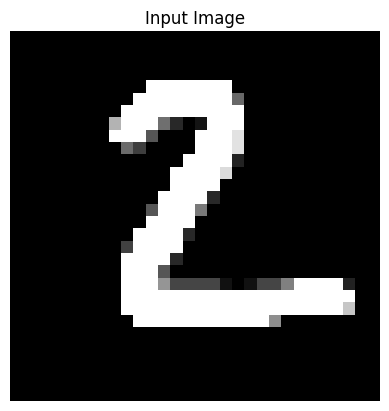

ValueError: cannot reshape array of size 20 into shape (4,4)

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Carica i dati dal file .mat
data = sio.loadmat('MnistConv.mat')
X = data['X']
W1 = data['W1']
W5 = data['W5']
Wo = data['Wo']

X = np.transpose(X, (2, 0, 1))
W1 = np.transpose(W1, (2, 0, 1))

# Esempio di utilizzo
k =  1
x =  X[k, :, :]
y1 = CNN.Conv(x, W1)
y2 = CNN.ReLU(y1)
y3 = CNN.Pool(y2)
y4 = y3.reshape(-1, 1)
v5 = W5 @ y4
y5 = CNN.ReLU(v5)
v =  Wo @ y5
y =  CNN.Softmax(v)

F = 20 
# Visualizza l'immagine di input
plt.figure()
CNN.display_network(x.reshape(-1, 1), title='Input Image')

# Visualizza i filtri di convoluzione
convFilters = np.zeros((F, 9*9))
for i in range(F):
    filter = W1[i, :, :]
    convFilters[i, :] = filter.flatten()

plt.figure()
CNN.display_network(convFilters, title='Convolution Filters')

# Visualizza le caratteristiche [Convolution]
fList = np.zeros((F, 20*20))
for i in range(F):
    feature = y1[i, :, :]
    fList[i, :] = feature.flatten()

plt.figure()
CNN.display_network(fList, title='Features [Convolution]')

# Visualizza le caratteristiche [Convolution + ReLU]
fList = np.zeros((F, 20*20))
for i in range(F):
    feature = y2[i, :, :]
    fList[i, :] = feature.flatten()

plt.figure()
CNN.display_network(fList, title='Features [Convolution + ReLU]')

# Visualizza le caratteristiche [Convolution + ReLU + MeanPool]
fList = np.zeros((F, 10*10))
for i in range(F):
    feature = y3[i, :, :]
    fList[i, :] = feature.flatten()

plt.figure()
CNN.display_network(fList, title='Features [Convolution + ReLU + MeanPool]')
